In [3]:
import numpy as np
import pandas as pd
import librosa as lr
import glob
import matplotlib.pyplot as plt
import os

from IPython.display import Audio
from volume_estimation import evaluation

ModuleNotFoundError: No module named 'volume_estimation'

In [2]:
rir_3_df = pd.read_csv('/home/ci411/volume_estimation/data/0812_rir_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/ci411/volume_estimation/data/0812_rir_df.csv'

Text(0.5, 1.0, 'Volume by Dataset')

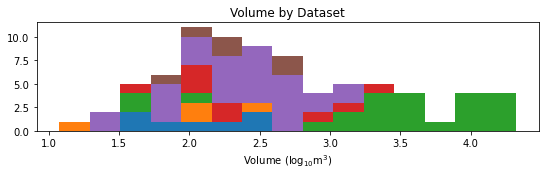

In [9]:
datasets = rir_3_df['dataset'].unique()
unique_rooms = rir_3_df.drop_duplicates('room')
fig = plt.figure(figsize=(9,2))
bins = 15
log_vols = []
for dataset in datasets:
    sub_df = unique_rooms[unique_rooms['dataset']==dataset]
    vols = sub_df['vol'].to_numpy()
    log_vols.append(np.log10(vols))

labels = ["ACE", "AIR", "OpenAIR", "BUT ReverbDB", "Simulated", "Original Measurements "]
plt.hist(log_vols, bins=bins, stacked=True, label=labels)
plt.xlabel(r"Volume (log$_{10}$m$^3$)")
#plt.legend()
plt.title("Volume by Dataset")

Text(0.5, 1.0, 'RT60 by Dataset')

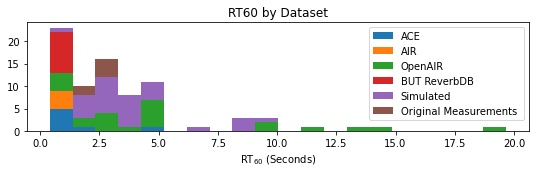

In [8]:
datasets = rir_3_df['dataset'].unique()
unique_rooms = rir_3_df.drop_duplicates('room')
fig = plt.figure(figsize=(9,2))
bins = 20
rt60s_all = []
for dataset in datasets:
    sub_df = unique_rooms[unique_rooms['dataset']==dataset]
    rt60s = sub_df['mean_rt60'].to_numpy()
    rt60s_all.append(rt60s)

labels = ["ACE", "AIR", "OpenAIR", "BUT ReverbDB", "Simulated", "Original Measurements "]
plt.hist(rt60s_all, bins=bins, stacked=True, label=labels)
plt.xlabel(r"RT$_{60}$ (Seconds)")
plt.legend()
plt.title("RT60 by Dataset")

In [6]:
rir_3_df.drop_duplicates('room').value_counts('dataset')

dataset
080322_pra      30
openair         23
BUT_ReverbDB     9
ace              7
sonos_boston     6
air              4
dtype: int64

In [7]:
rir_3_df.drop_duplicates('room').count()

Unnamed: 0       79
file             79
room             79
dataset          79
vol              79
computed_rt60    78
mean_rt60        79
dtype: int64

In [8]:
feat_df_path = "/scratch/ci411/sonos_rirs/features/081522_20k/081522_20k_prop0/feature_df.csv"
feat_df = pd.read_csv(feat_df_path)
feat_df.columns

Index(['file_speech', 'length (s)', 'file_rir', 'room', 'dataset', 'vol',
       'snr', 'clip_label', 'file_clip', 'rt60', 'file_feature', 'split'],
      dtype='object')

In [9]:
train_feats = feat_df[feat_df['split']=='train']

In [10]:
feat_df['split'].value_counts()

train    4940
val       549
test      485
Name: split, dtype: int64

In [14]:
feat_example = np.load(feat_df.sample(1)['file_feature'].iloc[0])

/state/partition1/job-26113062/ipykernel_1287177/2490509576.py:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(np.log(np.abs(feat_example['feat'])))


(0.0, 1997.0, 0.0, 24.0)

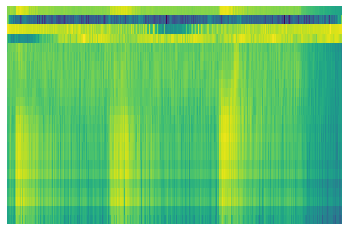

In [26]:
plt.pcolormesh(np.log(np.abs(feat_example['feat'])))
plt.grid(False)
plt.axis('off')

In [76]:
audio_df = pd.read_csv('/scratch/ci411/sonos_rirs/reverb_audio/081522_20K/audio_df.csv')

In [77]:
audio_df['clip_label']

0           clip0_snr_clean
1            clip0_snr_30db
2            clip0_snr_20db
3            clip0_snr_10db
4             clip0_snr_0db
                ...        
19995    clip3999_snr_clean
19996     clip3999_snr_30db
19997     clip3999_snr_20db
19998     clip3999_snr_10db
19999      clip3999_snr_0db
Name: clip_label, Length: 20000, dtype: object

Loading model info 101222_vol/prop1_vol_101222...
Building test dataloader from /scratch/ci411/sonos_rirs/features/101722_20k/101722_20k_prop1/feature_df.csv...
Loading model weights from /scratch/ci411/sonos_rirs/models/101222_vol/prop1_vol_101222/model_state.pt...
Running predictions...


100%|██████████| 2535/2535 [07:58<00:00,  5.30it/s]


Plotting 2535 points...
Plotting...


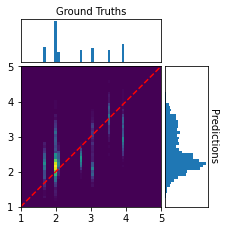

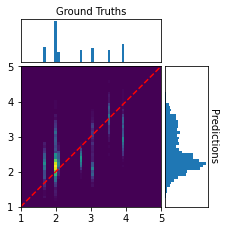

In [14]:
experiment_name = '101222_vol'
model_name = 'prop1_vol_101222'
evaluation.generate_confusion_plot(experiment_name, model_name, split='test', figside=3,\
                            bounds=[1,5], log=True)

Loading model info 101222_vol/prop1_vol_101222...
Building val dataloader from /scratch/ci411/sonos_rirs/features/101722_20k/101722_20k_prop1/feature_df.csv...
Loading model weights from /scratch/ci411/sonos_rirs/models/101222_vol/prop1_vol_101222/model_state.pt...
Running predictions...


100%|██████████| 1746/1746 [05:11<00:00,  5.61it/s]


Plotting 1746 points...
Plotting...


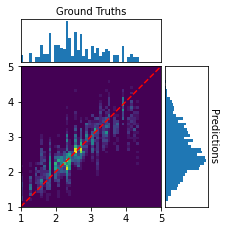

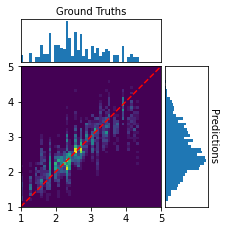

In [15]:
evaluation.generate_confusion_plot(experiment_name, model_name, split='val', figside=3,\
                            bounds=[1,5], log=True)

Loading model info 101222_vol/prop1_vol_101222...
Building train dataloader from /scratch/ci411/sonos_rirs/features/101722_20k/101722_20k_prop1/feature_df.csv...
Loading model weights from /scratch/ci411/sonos_rirs/models/101222_vol/prop1_vol_101222/model_state.pt...
Running predictions...


100%|██████████| 15719/15719 [49:43<00:00,  5.27it/s]


Plotting 15719 points...
Plotting...


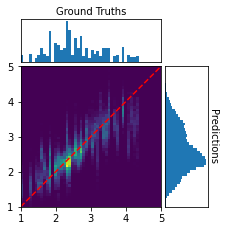

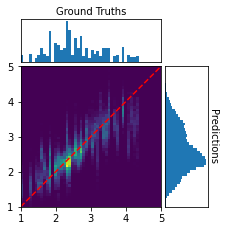

In [16]:
evaluation.generate_confusion_plot(experiment_name, model_name, split='train', figside=3,\
                            bounds=[1,5], log=True)